<a href="https://www.kaggle.com/code/osmanacar/gezinomi-rule-based?scriptVersionId=196891330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Gezinomi Dataset Information

Dataset includes sales prices and sales information about sales prices for Gezinomi company. 

The dataset consists of records created for each sales transaction.

Customer may have made purchase more than one.

**Variables**


* SaleId: Sales id

* SaleDate: Sales date

* CheckInDate: Date of customer log into the hotel

* Price: Price for sales

* ConceptName: Hotel concept information

* SaleCityName: Hotel location information

* CInDay: Day of customer log into the hotel

* SaleCheckInDayDiff: Difference date between check in and log into the hotel

* Season: Season information at log into the hotel

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.option_context('mode.use_inf_as_na', True)
warnings.simplefilter(action='ignore', category=FutureWarning)


df = pd.read_excel("/kaggle/input/gezinomi/miuul_gezinomi.xlsx")


In [2]:
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low


In [3]:
df.shape

(59164, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59164 entries, 0 to 59163
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SaleId              59164 non-null  int64         
 1   SaleDate            59164 non-null  datetime64[ns]
 2   CheckInDate         59164 non-null  datetime64[ns]
 3   Price               59151 non-null  float64       
 4   ConceptName         59164 non-null  object        
 5   SaleCityName        59164 non-null  object        
 6   CInDay              59164 non-null  object        
 7   SaleCheckInDayDiff  59164 non-null  int64         
 8   Seasons             59164 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 4.1+ MB


In [5]:
df.isnull().sum()

SaleId                 0
SaleDate               0
CheckInDate            0
Price                 13
ConceptName            0
SaleCityName           0
CInDay                 0
SaleCheckInDayDiff     0
Seasons                0
dtype: int64

# Data Analysis and Visualization

In [6]:
df["SaleCityName"].nunique()

6

In [7]:
saleCityName_counts = df["SaleCityName"].value_counts()
saleCityName_counts

SaleCityName
Antalya    31649
Muğla      10662
Aydın      10646
Diğer       3245
İzmir       2507
Girne        455
Name: count, dtype: int64

In [8]:
labels = saleCityName_counts.index
colors = ["cyan", "darkorange", "palegreen", "mediumpurple", "coral", "fuchsia"]

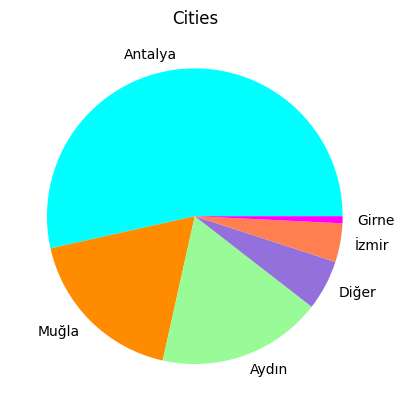

In [9]:
plt.pie(saleCityName_counts, labels=labels, colors=colors)
plt.title("Cities")
plt.show()

In [10]:
df["ConceptName"].nunique()

3

In [11]:
conceptName = df["ConceptName"].value_counts()
conceptName

ConceptName
Herşey Dahil      53186
Yarım Pansiyon     3559
Oda + Kahvaltı     2419
Name: count, dtype: int64

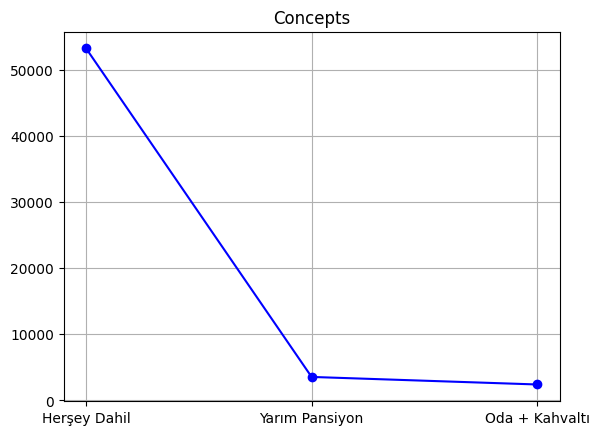

In [12]:
plt.plot(conceptName, marker='o', linestyle='-', color='b')
plt.title("Concepts")
plt.grid(True)
plt.show()         

In [13]:
df_saleCityName = df.groupby("SaleCityName").agg({"Price": "sum"})
df_saleCityName

,Price
SaleCityName,
Antalya,2041911.10
Aydın,573296.01
Diğer,154572.29
Girne,27065.03
Muğla,665842.21
İzmir,165934.83


<Axes: xlabel='SaleCityName'>

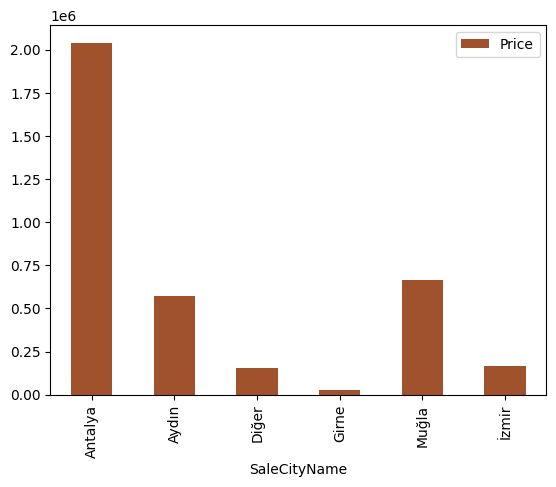

In [14]:
df_saleCityName.plot(kind="bar",color="sienna")

In [15]:
df_ConceptName = df.groupby("ConceptName").agg({"Price": "sum"})
df_ConceptName

,Price
ConceptName,
Herşey Dahil,3332910.77
Oda + Kahvaltı,121308.35
Yarım Pansiyon,174402.35


<Axes: ylabel='ConceptName'>

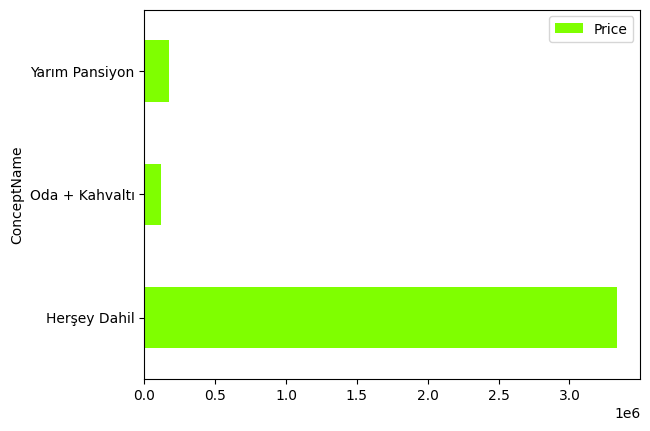

In [16]:
df_ConceptName.plot(kind="barh",color="chartreuse")

In [17]:
df_SaleCityName_mean = df.groupby("SaleCityName").agg({"Price": "mean"})
df_SaleCityName_mean

,Price
SaleCityName,
Antalya,64.52
Aydın,53.86
Diğer,47.71
Girne,59.48
Muğla,62.46
İzmir,66.27


<Axes: xlabel='SaleCityName'>

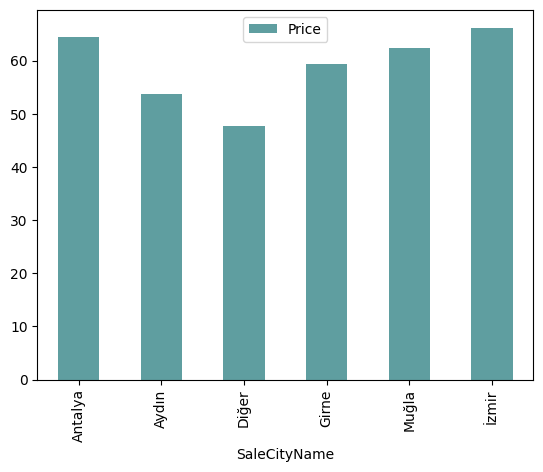

In [18]:
df_SaleCityName_mean.plot(kind="bar",color="cadetblue")

In [19]:
df_ConceptName_mean = df.groupby("ConceptName").agg({"Price": "mean"})
df_ConceptName_mean

,Price
ConceptName,
Herşey Dahil,62.67
Oda + Kahvaltı,50.25
Yarım Pansiyon,49.03


<Axes: ylabel='ConceptName'>

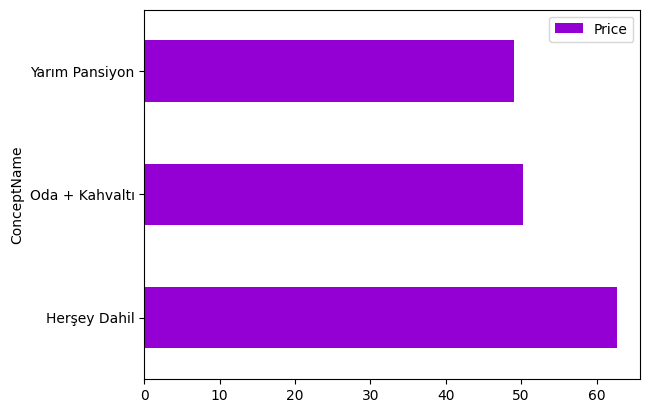

In [20]:
df_ConceptName_mean.plot(kind="barh",color="darkviolet")

In [21]:
sale_concept_pivot=df.pivot_table(index='SaleCityName', columns='ConceptName', values='Price', aggfunc='mean')
sale_concept_pivot

ConceptName,Herşey Dahil,Oda + Kahvaltı,Yarım Pansiyon
SaleCityName,,,
Antalya,64.52,63.50,67.19
Aydın,54.00,34.46,30.02
Diğer,84.77,37.60,42.11
Girne,97.68,39.78,53.25
Muğla,63.02,59.04,45.12
İzmir,74.70,41.32,59.61


<Axes: ylabel='SaleCityName'>

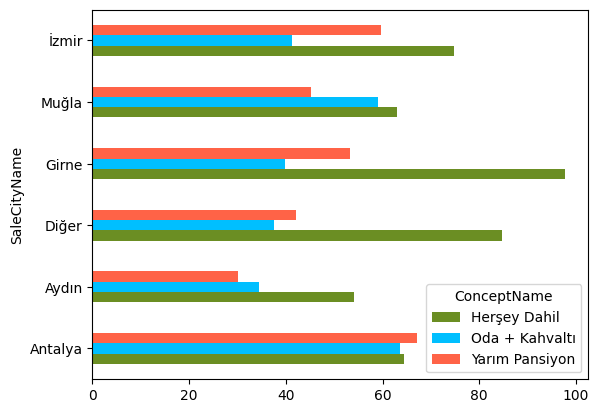

In [22]:
sale_concept_pivot.plot(kind="barh",color=["olivedrab", "deepskyblue","tomato"])

In [23]:
bins = [-1, 7, 30, 90, df["SaleCheckInDayDiff"].max()]
labels = ["Last Minuters", "Potential Planners", "Planners", "Early Bookers"]

df["CustomerCategory"] = pd.cut(df["SaleCheckInDayDiff"], bins=bins, labels=labels)

df.head(20)

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,CustomerCategory
0,415122,2022-12-03,2022-12-03,79.30,Herşey Dahil,Antalya,Saturday,0,Low,Last Minuters
1,415103,2022-12-03,2022-12-03,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,Last Minuters
2,404034,2022-09-12,2022-09-13,77.84,Herşey Dahil,Antalya,Tuesday,1,High,Last Minuters
3,415094,2022-12-03,2022-12-10,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,Last Minuters
4,414951,2022-12-01,2022-12-03,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,Last Minuters
5,415091,2022-12-03,2022-12-03,70.27,Yarım Pansiyon,İzmir,Saturday,0,Low,Last Minuters
6,415085,2022-12-03,2022-12-09,45.79,Yarım Pansiyon,Antalya,Friday,6,Low,Last Minuters
7,415084,2022-12-03,2022-12-03,51.24,Herşey Dahil,Antalya,Saturday,0,Low,Last Minuters
8,415081,2022-12-03,2022-12-04,77.29,Yarım Pansiyon,İzmir,Sunday,1,Low,Last Minuters
9,415079,2022-12-03,2022-12-03,68.68,Yarım Pansiyon,Diğer,Saturday,0,Low,Last Minuters


In [24]:
customer_category = df["CustomerCategory"].value_counts()
customer_category

CustomerCategory
Last Minuters         26564
Potential Planners    16621
Planners               9184
Early Bookers          6795
Name: count, dtype: int64

<Axes: ylabel='CustomerCategory'>

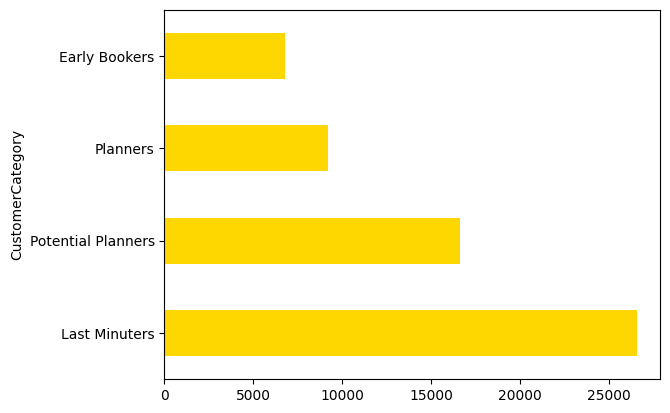

In [25]:
customer_category.plot(kind="barh",color="gold")

In [26]:
sale_concept_seasons = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"})
sale_concept_seasons

Price
SaleCityName ConceptName    Seasons       
Antalya      Herşey Dahil   High     64.92
                            Low      61.55
             Oda + Kahvaltı High     66.27
                            Low      60.67
             Yarım Pansiyon High     73.26
                            Low      62.00
Aydın        Herşey Dahil   High     54.95
                            Low      33.68
             Oda + Kahvaltı High     30.39
                            Low      44.45
             Yarım Pansiyon High     32.63
                            Low      25.27
Diğer        Herşey Dahil   High     83.79
                            Low      87.31
             Oda + Kahvaltı High     34.84
                            Low      39.96
             Yarım Pansiyon High     39.73
                            Low      42.95
Girne        Herşey Dahil   High    103.94
                            Low      90.94
             Oda + Kahvaltı High     39.48
                            Low      40.04
             Yarım Pansiyon High     58.38
                            Low      48.58
Muğla        Herşey Dahil   High     63.38
                            Low      48.30
             Oda + Kahvaltı High     61.26
                            Low      37.77
             Yarım Pansiyon High     45.82
                            Low      32.68
İzmir        Herşey Dahil   High     74.75
                            Low      74.31
             Oda + Kahvaltı High     54.14
                            Low      33.56
             Yarım Pansiyon High     87.66
                            Low      55.35

<Axes: xlabel='SaleCityName,ConceptName,Seasons'>

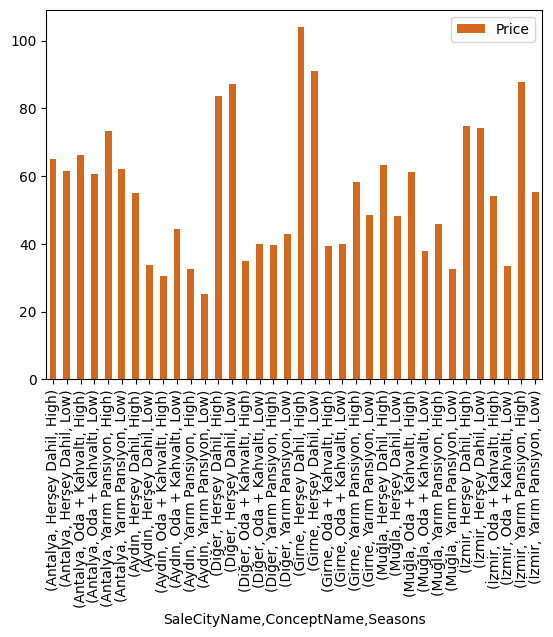

In [27]:
sale_concept_seasons.plot(kind="bar",color="chocolate")

In [28]:
sale_concept_seasons.reset_index(inplace=True)

# Customer Segmentation

In [29]:
sale_concept_seasons["NEW_LEVEL_BASED_CUSTOMER"] = sale_concept_seasons[["SaleCityName", "ConceptName", "Seasons"]].agg(lambda x: '_'.join(x).upper(),axis=1)
sale_concept_seasons

,SaleCityName,ConceptName,Seasons,Price,NEW_LEVEL_BASED_CUSTOMER
0,Antalya,Herşey Dahil,High,64.92,ANTALYA_HERŞEY DAHIL_HIGH
1,Antalya,Herşey Dahil,Low,61.55,ANTALYA_HERŞEY DAHIL_LOW
2,Antalya,Oda + Kahvaltı,High,66.27,ANTALYA_ODA + KAHVALTI_HIGH
3,Antalya,Oda + Kahvaltı,Low,60.67,ANTALYA_ODA + KAHVALTI_LOW
4,Antalya,Yarım Pansiyon,High,73.26,ANTALYA_YARIM PANSIYON_HIGH
5,Antalya,Yarım Pansiyon,Low,62.00,ANTALYA_YARIM PANSIYON_LOW
6,Aydın,Herşey Dahil,High,54.95,AYDIN_HERŞEY DAHIL_HIGH
7,Aydın,Herşey Dahil,Low,33.68,AYDIN_HERŞEY DAHIL_LOW
8,Aydın,Oda + Kahvaltı,High,30.39,AYDIN_ODA + KAHVALTI_HIGH
9,Aydın,Oda + Kahvaltı,Low,44.45,AYDIN_ODA + KAHVALTI_LOW


In [30]:
sale_concept_seasons["SEGMENT"] = pd.qcut(sale_concept_seasons["Price"], 4, labels=["D","C","B","A"])
sale_concept_seasons.head(15)

,SaleCityName,ConceptName,Seasons,Price,NEW_LEVEL_BASED_CUSTOMER,SEGMENT
0,Antalya,Herşey Dahil,High,64.92,ANTALYA_HERŞEY DAHIL_HIGH,B
1,Antalya,Herşey Dahil,Low,61.55,ANTALYA_HERŞEY DAHIL_LOW,B
2,Antalya,Oda + Kahvaltı,High,66.27,ANTALYA_ODA + KAHVALTI_HIGH,A
3,Antalya,Oda + Kahvaltı,Low,60.67,ANTALYA_ODA + KAHVALTI_LOW,B
4,Antalya,Yarım Pansiyon,High,73.26,ANTALYA_YARIM PANSIYON_HIGH,A
5,Antalya,Yarım Pansiyon,Low,62.00,ANTALYA_YARIM PANSIYON_LOW,B
6,Aydın,Herşey Dahil,High,54.95,AYDIN_HERŞEY DAHIL_HIGH,B
7,Aydın,Herşey Dahil,Low,33.68,AYDIN_HERŞEY DAHIL_LOW,D
8,Aydın,Oda + Kahvaltı,High,30.39,AYDIN_ODA + KAHVALTI_HIGH,D
9,Aydın,Oda + Kahvaltı,Low,44.45,AYDIN_ODA + KAHVALTI_LOW,C


In [31]:
new_user = "MUĞLA_YARIM PANSIYON_LOW"
sale_concept_seasons[sale_concept_seasons["NEW_LEVEL_BASED_CUSTOMER"] == new_user]

,SaleCityName,ConceptName,Seasons,Price,NEW_LEVEL_BASED_CUSTOMER,SEGMENT
29,Muğla,Yarım Pansiyon,Low,32.68,MUĞLA_YARIM PANSIYON_LOW,D


In [32]:
new_user = "AYDIN_YARIM PANSIYON_HIGH"
sale_concept_seasons[sale_concept_seasons["NEW_LEVEL_BASED_CUSTOMER"] == new_user]

,SaleCityName,ConceptName,Seasons,Price,NEW_LEVEL_BASED_CUSTOMER,SEGMENT
10,Aydın,Yarım Pansiyon,High,32.63,AYDIN_YARIM PANSIYON_HIGH,D
